# Airline passengers prediction

In [45]:
import numpy as np
import pandas as pd
from keras import Sequential
from keras.layers import Dense, LSTM
import urllib.request
import matplotlib.pyplot as plt

## Download data
https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

In [46]:
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
response = urllib.request.urlretrieve(URL, "airline_passenfers.csv")

In [47]:
dataframe = pd.read_csv('airline_passenfers.csv', usecols=[1])
dataframe.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


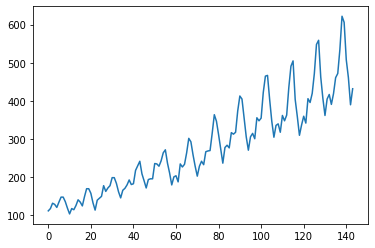

In [48]:
plt.plot(dataframe)

## Preprocessing

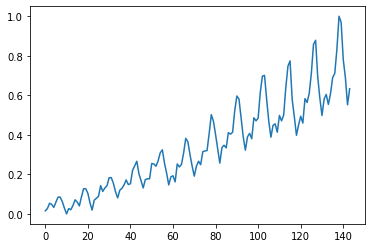

In [49]:
from sklearn.preprocessing import MinMaxScaler

dataset = dataframe.values.astype('float32')
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
plt.plot(dataset)

In [50]:
test_size = int(len(dataset)/4)
train_size = len(dataset) -test_size

train_data = dataset[:train_size, :]
test_data = dataset[train_size:, :]
len(train_data), len(test_data)

(108, 36)

In [51]:
def dataset_creation(data, step_back=1):
    X, y = [], []
    for i in range(len(data) - step_back - 1):
        X.append(data[i:(i+step_back), 0])
        y.append(data[i + step_back, 0])
    return np.array(X), np.array(y)

In [62]:
X_train, y_train = dataset_creation(train_data, step_back=1)
X_test, y_test = dataset_creation(test_data, step_back=1)
X_train[0:3], y_train[0:3]

(array([[0.01544401],
        [0.02702703],
        [0.05405405]], dtype=float32),
 array([0.02702703, 0.05405405, 0.04826255], dtype=float32))

reshape input to be [samples, time steps, features]

In [63]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape, X_test.shape

((106, 1, 1), (34, 1, 1))

## Baseline

In [64]:
def model_creation(step_back=1):
    model = Sequential([
        LSTM(4, input_shape=(1, step_back)),
        Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [65]:
model = model_creation(step_back=1)

In [66]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
106/106 - 2s - loss: 0.0640 - 2s/epoch - 16ms/step
Epoch 2/100
106/106 - 0s - loss: 0.0318 - 203ms/epoch - 2ms/step
Epoch 3/100
106/106 - 0s - loss: 0.0241 - 156ms/epoch - 1ms/step
Epoch 4/100
106/106 - 0s - loss: 0.0220 - 150ms/epoch - 1ms/step
Epoch 5/100
106/106 - 0s - loss: 0.0203 - 151ms/epoch - 1ms/step
Epoch 6/100
106/106 - 0s - loss: 0.0185 - 155ms/epoch - 1ms/step
Epoch 7/100
106/106 - 0s - loss: 0.0168 - 155ms/epoch - 1ms/step
Epoch 8/100
106/106 - 0s - loss: 0.0151 - 155ms/epoch - 1ms/step
Epoch 9/100
106/106 - 0s - loss: 0.0135 - 152ms/epoch - 1ms/step
Epoch 10/100
106/106 - 0s - loss: 0.0120 - 150ms/epoch - 1ms/step
Epoch 11/100
106/106 - 0s - loss: 0.0104 - 149ms/epoch - 1ms/step
Epoch 12/100
106/106 - 0s - loss: 0.0090 - 152ms/epoch - 1ms/step
Epoch 13/100
106/106 - 0s - loss: 0.0077 - 150ms/epoch - 1ms/step
Epoch 14/100
106/106 - 0s - loss: 0.0065 - 154ms/epoch - 1ms/step
Epoch 15/100
106/106 - 0s - loss: 0.0056 - 153ms/epoch - 1ms/step
Epoch 16/100
106/106 

In [67]:
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)

prediction_train = scaler.inverse_transform(prediction_train)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
prediction_test = scaler.inverse_transform(prediction_test)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

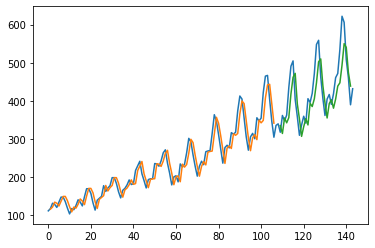

In [68]:
step_back = 1
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[step_back:len(prediction_train)+step_back, :] = prediction_train

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(prediction_train)+(step_back*2)+1:len(dataset)-1, :] = prediction_test
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)

In [71]:
from sklearn.metrics import mean_squared_error

score_train = np.sqrt(mean_squared_error(y_train, prediction_train[:,0]))
print('Train Score: %.2f RMSE' % (score_train))
score_test = np.sqrt(mean_squared_error(y_test, prediction_test[:,0]))
print('Test Score: %.2f RMSE' % (score_test))

Train Score: 25.32 RMSE
Test Score: 52.42 RMSE
